In [ ]:
from qiskit import QuantumCircuit
from qiskit import quantum_info
from qiskit.primitives import StatevectorEstimator, StatevectorSampler
from qiskit.circuit import Parameter
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2
from qiskit import transpile

import numpy as np

/Users/isambalghari/MS Physics/Summer-23-24/Intro to Quantum Computing/Qiskit/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Groover Algorithm without Ancilla

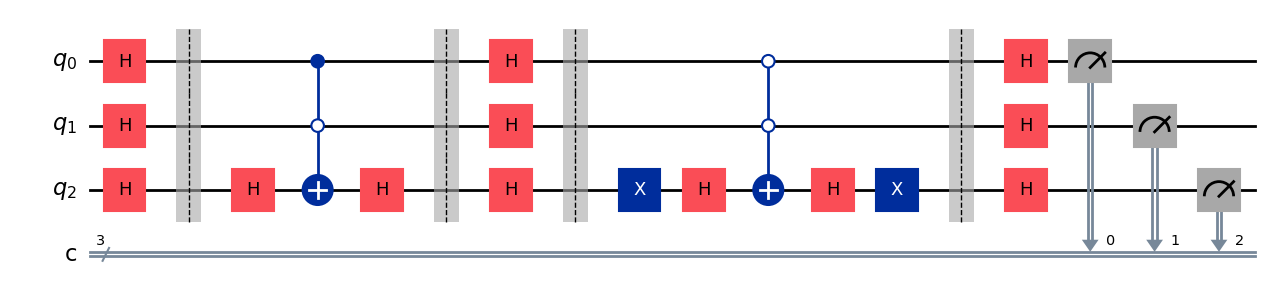

In [ ]:
circuit2 = QuantumCircuit(3, 3)

circuit2.h([0, 1, 2])
circuit2.barrier()

circuit2.h(2)
circuit2.ccx(0, 1, 2, ctrl_state="01")
circuit2.h(2)
circuit2.barrier()
# circuit2.save_statevector()

circuit2.h([0, 1, 2])
circuit2.barrier()
circuit2.x(2)
circuit2.h(2)
circuit2.ccx(0, 1, 2, ctrl_state="00")
circuit2.h(2)
circuit2.x(2)
circuit2.barrier()

circuit2.h([0, 1, 2])

circuit2.measure([0, 1, 2], [0, 1, 2])

circuit2.draw('mpl')

In [ ]:
# from qiskit.providers.basic_provider import BasicSimulator
# from qiskit import transpile
# aer_simulator = AerSimulator()
# result = aer_simulator.run(circuit2, shots=1000).result()
# basic_sim = BasicSimulator()
# circuit2_transp = transpile(circuit2, backend=basic_sim)
# result = basic_sim.run(circuit2_transp, shots=10000).result()
# stats = result.get_counts()
# plot_histogram(stats)

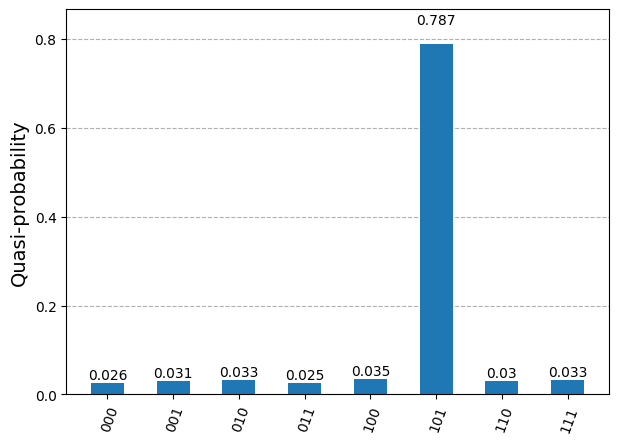

In [ ]:
sampler = StatevectorSampler()

results = sampler.run([(circuit2, None, 1000)]).result()

stats = results[0].data.c.get_counts()
plot_distribution(stats)

In [ ]:
backend = QiskitRuntimeService().get_backend('ibm_osaka')
sampler = SamplerV2(backend=backend)

In [ ]:
circuit2_transp = transpile(circuit2, backend=backend)
job = sampler.run([(circuit2_transp, None, 1000)])
print('job id: ', job.job_id)

job id:  <bound method BasePrimitiveJob.job_id of <RuntimeJobV2('ct04cmacqfh00089jqag', 'sampler')>>


In [ ]:
job_id = 'ct04cmacqfh00089jqag'
job = QiskitRuntimeService().job(job_id)
result = job.result()

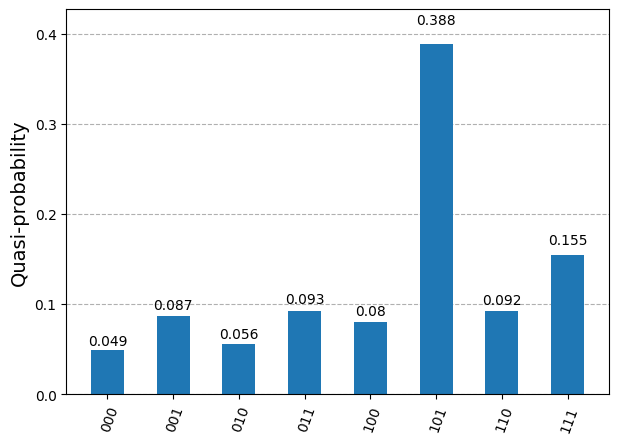

In [ ]:
stats = result[0].data.c.get_counts()
plot_distribution(stats)